In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('http://bit.ly/kaggletrain')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Value Counts of a Series

In [5]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
df.Sex.value_counts(normalize = True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [13]:
%matplotlib inline

Cross tab two columns and plot results

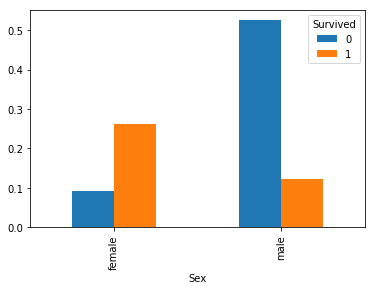

In [18]:
pd.crosstab(df.Sex,df.Survived,normalize = True).plot(kind = 'bar')

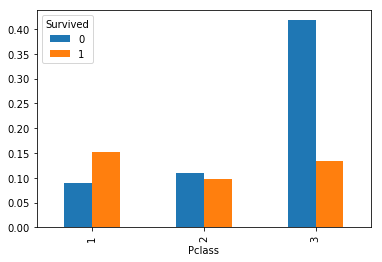

In [26]:
pd.crosstab(df.Pclass,df.Survived, normalize = True).plot(kind = 'bar')

Group one series by another series using groupby

In [40]:
df.groupby(['Sex','Pclass']).Survived.mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

Filter by multiple columns and check results

In [45]:
df[(df.Pclass == 1)& (df.Sex == 'female')].Survived.value_counts()

1    91
0     3
Name: Survived, dtype: int64

In [46]:
91/94

0.9680851063829787

Drop rows with NAs in a certain column and check shape

In [52]:
df.dropna(subset=['Age'], how = 'any',inplace = True)

In [53]:
df.shape

(714, 12)

Map a column to new values based on a dictionary

In [56]:
df['Sex_num'] = df.Sex.map({'female':0, 'male':1})

In [84]:
df.loc[0:4,'Sex':'Sex_num'].head()

,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num
0,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,female,35.0,1,0,113803,53.1000,C123,S,0
4,male,35.0,0,0,373450,8.0500,NaN,S,1


In [58]:
import numpy as np

Use apply to perform a numpy function on a series

In [68]:
df['Fare_ceil'] = df.Fare.apply(np.ceil).astype(int)

In [69]:
df.loc[0:4,['Fare','Fare_ceil']]

,Fare,Fare_ceil
0,7.2500,8
1,71.2833,72
2,7.9250,8
3,53.1000,54
4,8.0500,9


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
Sex_num        714 non-null int64
Fare_ceil      714 non-null int32
dtypes: float64(2), int32(1), int64(6), object(5)
memory usage: 80.9+ KB


Use apply and lambda function to split a string into different rows

In [85]:
df.Name.str.split(',').apply(lambda x:x[0]).head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

In [86]:
df.Name.str.split(',').apply(lambda x:x[1]).str.split().apply(lambda x:x[0]).head()

0      Mr.
1     Mrs.
2    Miss.
3     Mrs.
4      Mr.
Name: Name, dtype: object

In [121]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [122]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [123]:
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [124]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [125]:
drinks[drinks.continent=='South America']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
6,Argentina,193,25,221,8.3,South America
20,Bolivia,167,41,8,3.8,South America
23,Brazil,245,145,16,7.2,South America
35,Chile,130,124,172,7.6,South America
37,Colombia,159,76,3,4.2,South America
52,Ecuador,162,74,3,4.2,South America
72,Guyana,93,302,1,7.1,South America
132,Paraguay,213,117,74,7.3,South America
133,Peru,163,160,21,6.1,South America
163,Suriname,128,178,7,5.6,South America


In [126]:
drinks.loc[30, 'beer_servings']

57

In [127]:
drinks.set_index('country', inplace = True)

In [128]:
drinks.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [129]:
drinks.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [130]:
drinks.shape

(193, 5)

Changing index and changing it back

In [131]:
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [132]:
drinks.reset_index(inplace=True)

In [133]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [134]:
drinks.describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [135]:
drinks.set_index('country', inplace = True)

In [141]:
drinks.continent.value_counts()

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64